# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [126]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

601

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
temp_units = "imperial"
url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={temp_units}&q="

In [8]:
#Create lists for the dataframe
city_name = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

counter = 0
set_num = 1


print('Beginning Data Retrieval\n-----------------------------')

for city in cities:
    try:
        response = requests.get(url + city.replace(" ","&")).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if counter > 49:
            counter = 1
            set_num += 1
            city_name.append(city)
        else:
            counter += 1
            city_name.append(city)
        print(f"Processing Record {counter} of Set {set_num} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("-----------------------------\nData Retrieval Complete\n-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | castro
Processing Record 2 of Set 1 | vaini
Processing Record 3 of Set 1 | nanortalik
Processing Record 4 of Set 1 | severo-kurilsk
Processing Record 5 of Set 1 | bluff
Processing Record 6 of Set 1 | vangaindrano
Processing Record 7 of Set 1 | yarim
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | santa rosa
Processing Record 10 of Set 1 | bengkulu
Processing Record 11 of Set 1 | pampa
Processing Record 12 of Set 1 | lagunas
Processing Record 13 of Set 1 | saskylakh
City not found. Skipping...
Processing Record 14 of Set 1 | hobart
Processing Record 15 of Set 1 | provideniya
Processing Record 16 of Set 1 | kendari
Processing Record 17 of Set 1 | bethel
Processing Record 18 of Set 1 | tiksi
Processing Record 19 of Set 1 | ornskoldsvik
Processing Record 20 of Set 1 | kaitangata
Processing Record 21 of Set 1 | busselton
Processing Record 22 of Set 1 | mataura
Processing Record 23 of 

Processing Record 39 of Set 4 | rio gallegos
Processing Record 40 of Set 4 | rio grande
Processing Record 41 of Set 4 | ponta do sol
City not found. Skipping...
Processing Record 42 of Set 4 | kodiak
City not found. Skipping...
Processing Record 43 of Set 4 | maldonado
Processing Record 44 of Set 4 | airai
Processing Record 45 of Set 4 | zhigansk
Processing Record 46 of Set 4 | mecca
Processing Record 47 of Set 4 | sinnamary
Processing Record 48 of Set 4 | mayumba
Processing Record 49 of Set 4 | hamilton
Processing Record 50 of Set 4 | bluefield
Processing Record 1 of Set 5 | svetlyy
Processing Record 2 of Set 5 | bubaque
Processing Record 3 of Set 5 | altos del rosario
Processing Record 4 of Set 5 | coahuayana
Processing Record 5 of Set 5 | mehamn
Processing Record 6 of Set 5 | dikson
City not found. Skipping...
Processing Record 7 of Set 5 | hurricane
Processing Record 8 of Set 5 | shostka
Processing Record 9 of Set 5 | gold coast
City not found. Skipping...
Processing Record 10 of S

Processing Record 27 of Set 8 | esterhazy
Processing Record 28 of Set 8 | moengo
Processing Record 29 of Set 8 | huambo
City not found. Skipping...
Processing Record 30 of Set 8 | fort nelson
Processing Record 31 of Set 8 | myingyan
City not found. Skipping...
Processing Record 32 of Set 8 | sabang
Processing Record 33 of Set 8 | komsomolskiy
Processing Record 34 of Set 8 | ballina
Processing Record 35 of Set 8 | port-gentil
Processing Record 36 of Set 8 | caravelas
Processing Record 37 of Set 8 | roebourne
Processing Record 38 of Set 8 | burley
Processing Record 39 of Set 8 | jacksonville
Processing Record 40 of Set 8 | luderitz
Processing Record 41 of Set 8 | borogontsy
Processing Record 42 of Set 8 | hawalli
Processing Record 43 of Set 8 | poum
Processing Record 44 of Set 8 | niquelandia
City not found. Skipping...
Processing Record 45 of Set 8 | verkhnyaya toyma
Processing Record 46 of Set 8 | banjar
Processing Record 47 of Set 8 | kozhevnikovo
Processing Record 48 of Set 8 | masug

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
#Create a dictionary to include the lists
weather_dict = {
    "City":city_name,
    "Cloudiness":cloudinesses,
    "Country":countries,
    "Date":dates,
    "Humidity":humidities,
    "Lat":lats,
    "Lng":lngs,
    "Max Temp":max_temps,
    "Wind Speed":wind_speeds
}

#Create a dataframe from the dictionary
weather_df = pd.DataFrame(weather_dict)

weather_df.count()

City          541
Cloudiness    541
Country       541
Date          541
Humidity      541
Lat           541
Lng           541
Max Temp      541
Wind Speed    541
dtype: int64

In [129]:
weather_df.to_csv("output_data/weather_df.csv")

In [12]:
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,castro,100,BR,1580356866,98,-24.79,-50.01,66.25,2.39
1,vaini,75,TO,1580357137,79,-21.20,-175.20,86.00,5.82
2,nanortalik,0,GL,1580356937,48,60.14,-45.24,22.08,25.99
3,severo-kurilsk,100,RU,1580356935,85,50.68,156.12,23.07,1.36
4,bluff,100,NZ,1580356937,51,-46.60,168.33,71.01,21.00


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Humidity Plot

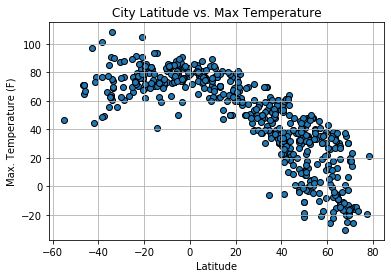

In [17]:
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], edgecolors = "black")
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("output_data/fig1.png")
plt.show()

This scatter plot shows that, the closer a city to equator, the higher temperature it has.

#### Latitude vs. Humidity Plot

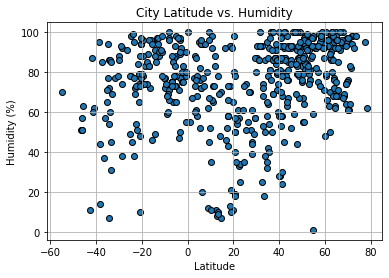

In [18]:
plt.scatter(weather_df["Lat"], weather_df["Humidity"], edgecolors = "black")
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("output_data/fig2.png")
plt.show()

This plot shows the relationship between a city's latitude and its humidity. However, there is not an obvious trend formed.

#### Latitude vs. Cloudiness Plot

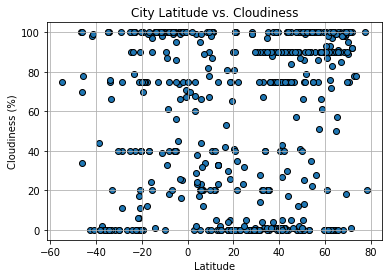

In [19]:
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], edgecolors = "black")
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("output_data/fig3.png")
plt.show()

This scatter plot shows how the distance to equator has affected the cloudiness of a city. The datapoints on the scatter plot are pretty spread out, so we cannot see a clear relationship between the two.

#### Latitude vs. Wind Speed Plot

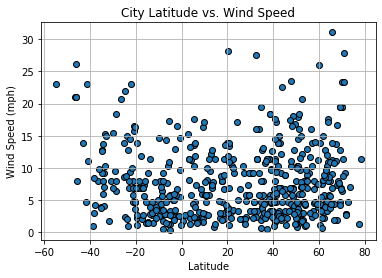

In [20]:
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], edgecolors = "black")
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("output_data/fig4.png")
plt.show()

This scatter plot shows the relationship between a city's latitude and its wind speed. Most cities in the dataset has a wind speed lower than 20mph, and there is not an obvious trend formed between latitude and wind speed.

## Linear Regression

In [66]:
# OPTIONAL: Create a function to create Linear Regression plots
def lreg(x_values, y_values, x_label, y_label, hemisphere, line_place):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    reg_values = x_values * slope + intercept
    
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    plt.scatter(x_values, y_values)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
  
    plt.annotate(line_eq,line_place,fontsize=15,color="red")
   
    print(f"The r-squared is: {rvalue}")
    
    return plt.plot(x_values,reg_values,"r-")

In [67]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere_weather_df = weather_df.loc[weather_df["Lat"] >= 0]
southern_hemisphere_weather_df = weather_df.loc[weather_df["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8364173366003333


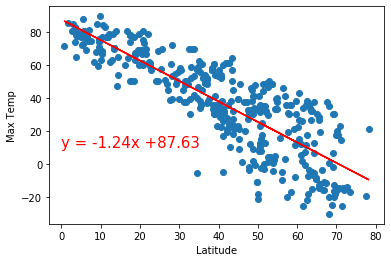

In [79]:
x_values = northern_hemisphere_weather_df['Lat']
y_values = northern_hemisphere_weather_df['Max Temp']
lreg(x_values, y_values, "Latitude", "Max Temp", "Northern",(0, 10))

The linear regression indicates that, when latitude increases for 1 unit, the city's max temperature decreases for 1.24 unit in north hemisphere. About 84% of a city's max temperature can be explained by the city's latitude.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.24970878051843562


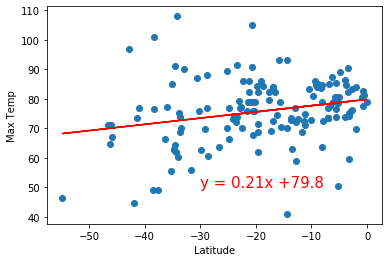

In [119]:
x_values = southern_hemisphere_weather_df['Lat']
y_values = southern_hemisphere_weather_df['Max Temp']
lreg(x_values, y_values, "Latitude", "Max Temp", "Southern",(-30, 50))

The graph shows that when latitude increases for 1 unit, a city's max temperature increases for 0.21 unit for south hemisphere. Only 25% of the temerature can be explained by latitude.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.40092951430956714


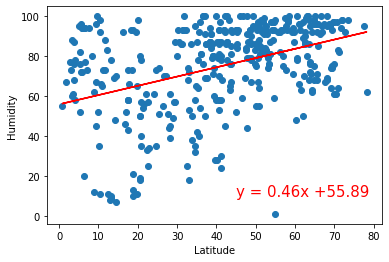

In [118]:
x_values = northern_hemisphere_weather_df['Lat']
y_values = northern_hemisphere_weather_df['Humidity']
lreg(x_values, y_values, "Latitude", "Humidity", "Northern",(45, 10))

The graph for the linear regression indicates that, in north hemisphere, as latitude increases for 1 unit, humidity increases for 0.46, and 40% of a city's humidity is explained by how close to or far away from equator.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.36241248105547996


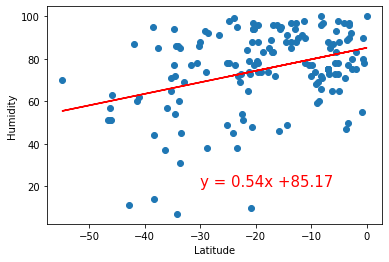

In [117]:
x_values = southern_hemisphere_weather_df['Lat']
y_values = southern_hemisphere_weather_df['Humidity']
lreg(x_values, y_values, "Latitude", "Humidity", "Southern",(-30, 20))

This graph illustrates that as the latitude increases for 1 unit, the humidity will increase by 0.54, and around 36% of a city's humidity is explained by its latitude in south hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.32610697056483645


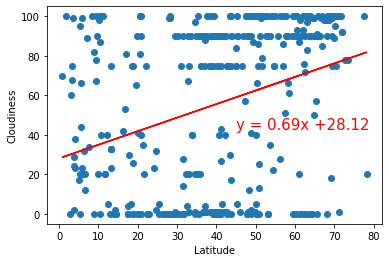

In [116]:
x_values = northern_hemisphere_weather_df['Lat']
y_values = northern_hemisphere_weather_df['Cloudiness']
lreg(x_values, y_values, "Latitude", "Cloudiness", "Northern",(45, 43))

The graph shows that in northern hemisphere, as latitude increases for 1 unit, a city's cloudiness increases for 0.69 unit. The r-squared value indicates that about 33% of a city's cloudiness can be explained by latitude.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.35135019080756086


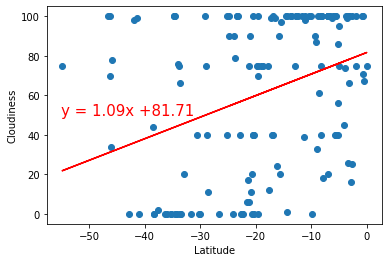

In [115]:
x_values = southern_hemisphere_weather_df['Lat']
y_values = southern_hemisphere_weather_df['Cloudiness']
lreg(x_values, y_values, "Latitude", "Cloudiness", "Southern",(-55, 50))

This plot shows that as a city's latitude increases for 1 unit in southern hemisphere, its cloudiness will go up for 1.09 unit, and 35% of a city's cloudiness can be explained by its latitude.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.12268811352447542


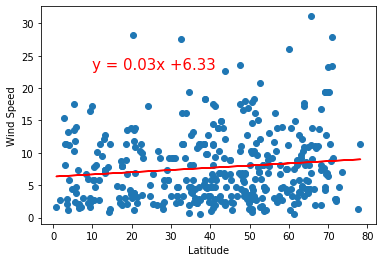

In [114]:
x_values = northern_hemisphere_weather_df['Lat']
y_values = northern_hemisphere_weather_df['Wind Speed']
lreg(x_values, y_values, "Latitude", "Wind Speed", "Northern",(10, 23))

The graph indicates that, in north hemisphere, when latitude increases for 1 unit, the city's wind speed increases for 0.03 unit. Also, only 12% of a city's wind speed can be explained by its latitude.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.45816771154005226


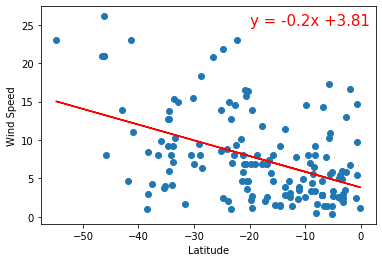

In [122]:
x_values = southern_hemisphere_weather_df['Lat']
y_values = southern_hemisphere_weather_df['Wind Speed']
lreg(x_values, y_values, "Latitude", "Wind Speed", "Southern",(-20, 25))

This plot shows that in south hemisphere, when latitude increase for 1 unit, the city's wind speed usually decrease for 0.2 unit, and around 46% of a city's wind speed can be explained by its latitude.